In [15]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2



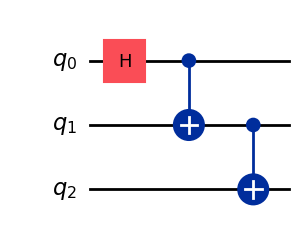

In [16]:
# Create a clean 3-qubit GHZ circuit for grading (NO measurement)
qc = QuantumCircuit(3)

qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)

qc.draw("mpl")


In [17]:
grade_lab0_ex1(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


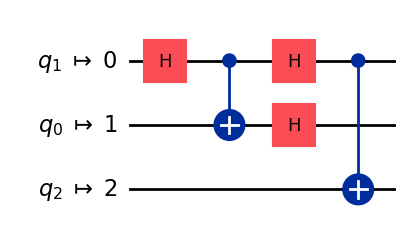

In [18]:
coupling_map = [[0, 1], [0, 2]]
qc_transpiled = transpile(qc, coupling_map=coupling_map)

qc_transpiled.draw("mpl")


In [19]:
grade_lab0_ex2(qc_transpiled)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [20]:
qc_exec = QuantumCircuit(3)
qc_exec.h(0)
qc_exec.cx(0, 1)
qc_exec.cx(1, 2)
qc_exec.measure_all()

In [21]:
backend = AerSimulator()
sampler = Sampler(mode=backend)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc_exec]))
results_sampler = job.result()


In [22]:
estimator = Estimator(mode=backend)

ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

pub = (qc_exec, observables)
job = estimator.run(pubs=[pub])
results_estimator = job.result()


In [23]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Outcomes : {counts_list}")
plot_histogram(counts_list, title="GHZ state")
plt.show()

  Outcomes : {'000': 530, '111': 494}


Expectation values: [('ZZZ', np.float64(-0.0107421875)), ('ZZX', np.float64(0.001953125)), ('ZII', np.float64(-0.01904296875)), ('XXI', np.float64(0.00830078125)), ('ZZI', np.float64(1.0)), ('III', np.float64(1.0))]


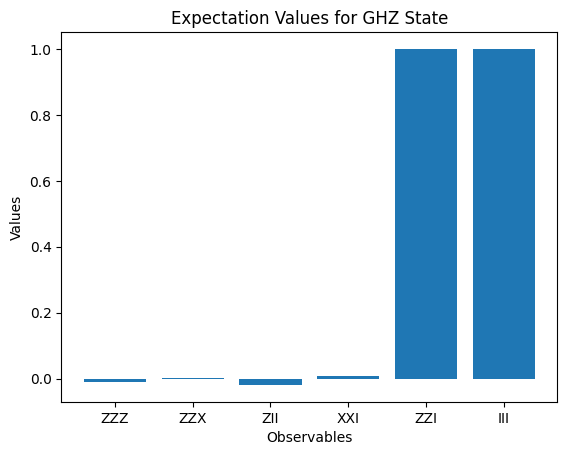

In [24]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

plt.bar(observables_list, exp_values, width=0.8)
plt.xlabel("Observables")
plt.ylabel("Values")
plt.title("Expectation Values for GHZ State")
plt.show()

In [25]:
grade_lab0_ex1(qc)
grade_lab0_ex2(qc_transpiled)


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.
Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [26]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(name="qgss-2025")
print(service.saved_accounts())

{'qgss-2025': {'channel': 'ibm_quantum_platform', 'url': 'https://cloud.ibm.com', 'token': 'j4MxUf6EZ0xR8RxcjXJ1w6MIfv1u-NoxO3AXSBGRiTIR', 'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/f45e667ab0174f6d860e44a5b8aea0af:f81a572d-0e39-446e-b820-3ada6c1ac0aa::', 'verify': True, 'private_endpoint': False}}


In [27]:
grade_lab0_ex1(qc)
grade_lab0_ex2(qc_transpiled)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.
Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.
